In [23]:
from crpropa import *
import pylab as pl
import numpy as np 
from aab_subroutines import * 
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.coordinates import SkyCoord
from astropy import units as u
from projection import * 
%matplotlib inline
#pl.rcParams["text.usetex"] = "True"

print (mpl.__version__)

def CoLat2Lat(latitude):
    return (np.pi/2 - latitude)

def Lat2CoLat(latitude):
    return (np.pi/2 - latitude)

def Convert2Plot(lon):
    lon[(lon > np.pi)] = lon[(lon > np.pi)] - (2.0*np.pi)
    lon[(lon <= np.pi)] = -lon[(lon <= np.pi)]
    return lon


2.2.3


/home/matthewsj/.virtualenvs/crpropa/lib/python2.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/special/__init__.py:531: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._ufuncs import *
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/spatial/__init__.py:90: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .ckdtree import *
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/spatial/__init__.py:91: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .qhull import *


((199, 199), (199,), (199,))


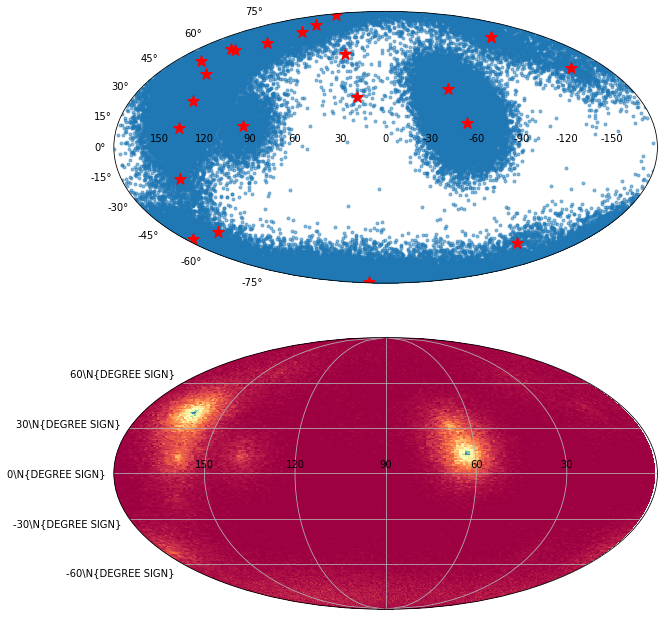

In [2]:
## Backtracking including uncertainties
R = Random()  # CRPropa random number generator
position = Vector3d(-8.5, 0, 0) * kpc

l, b, distances, fluxes, atw_a, atw_b, atw_c, cont_a, cont_b, cont_c  = np.genfromtxt("sbgs.dat", 
                                                                                       unpack=True, 
                                                                                       usecols = np.arange(1,11))
N = 100000
weight_to_use = atw_a
n_per_source = N * weight_to_use / 100.0
n_per_source = n_per_source.astype(int)

lons, lats = [], []
meanDir = Vector3d()
sigmaDir = 0.15
sigmaDir = 0.3
kappa = 20

lats0 = np.pi/2 - (b*np.pi/180.0)
lons0 = (l*np.pi/180.0)
lons0[(lons0>np.pi)] -= 2.0 * np.pi

       
for i in range(len(l)):
    # set up the direction object

    meanDir.setRThetaPhi(1, lats0[i], lons0[i])
    
    # Monte Carlo some random energies and directions 
    for j in range(n_per_source[i]):
        d1 = R.randFisherVector (meanDir, kappa)

        lons.append(d1.getPhi())
        lats.append(d1.getTheta())

lats = np.pi/2 - np.array(lats)
lats0 = np.pi/2 - np.array(lats0)

source = SkyCoord(l=lons*u.radian, b=lats*u.radian, frame='galactic')
plt.figure(figsize=(20,11))
pl.subplot(211, projection = 'mollweide')
# pl.title("Backtracking TA Events, Galactic, True Energies / {}".format(energy_factor))
import matplotlib
pl.gca().set_xticklabels(np.arange(150,-180,-30))
pl.scatter(Convert2Plot(source.galactic.l.radian), source.galactic.b.radian, alpha=0.5, marker='.')
pl.scatter(Convert2Plot(lons0), lats0, alpha=1, marker='*', c="r", s=150)

pl.subplot(212, projection = 'custom_auger')

nn = 200
theta_add = np.arccos(np.linspace(1,0, num = nn))
theta = np.zeros(2*nn+1)
theta[:nn+1] -= np.arccos(np.linspace(0,1, num = nn+1))
theta[nn:] += np.arccos(np.linspace(1,0, num = nn+1))
theta+=1e-6

# print theta

bins = (np.linspace(-np.pi,np.pi,num=200), theta)
bins = (np.linspace(-np.pi,np.pi,num=200), np.linspace(-np.pi/2,np.pi/2,num=200))

hist, x, y = np.histogram2d(Convert2Plot(source.galactic.l.radian), source.galactic.b.radian, bins = bins)

print (hist.shape, x[:-1].shape, y[:-1].shape)
from scipy.interpolate import interp2d 
interp_func = interp2d(x[:-1],y[:-1], hist.T, kind='cubic')


pl.gca().pcolormesh(x[:-1],y[:-1],interp_func(x[:-1],y[:-1]), cmap="Spectral")
pl.gca().set_xticklabels(np.arange(150,-180,-30))
pl.grid()

In [22]:
## Backtracking including uncertainties
import scipy.ndimage
# Apply gaussian filter
sigma = [5.0, 5.0]


R = Random()  # CRPropa random number generator
position = Vector3d(-8.5, 0, 0) * kpc

l, b, distances, fluxes, atw_a, atw_b, atw_c, cont_a, cont_b, cont_c  = np.genfromtxt("radio-gals.dat", 
                                                                                       unpack=True, 
                                                                                       usecols = np.arange(1,11))


names = np.genfromtxt("radio-gals.dat", unpack=True, usecols = (0), dtype=str)

weights = [atw_a, atw_b, atw_c]
labels = ["a", "b", "c"]

for iw in range(len(weights)):
    print iw
    weight_to_use = weights[iw]
    n_per_source = N * weight_to_use / np.sum(weight_to_use)
    n_per_source = n_per_source.astype(int)

    lons, lats = [], []
    meanDir = Vector3d()
    sigmaDir = 0.15
    kappa = 1000

    lats0 = np.pi/2 - (b*np.pi/180.0)
    lons0 = (l*np.pi/180.0)
    lons0[(lons0>np.pi)] -= 2.0 * np.pi

    print (lats0, b)

    for i in range(len(l)):
        # set up the direction object

        meanDir.setRThetaPhi(1, lats0[i], lons0[i])
    
        # Monte Carlo some random energies and directions 
        for j in range(n_per_source[i]):
            d1 = R.randFisherVector (meanDir, kappa)

            lons.append(d1.getPhi())
            lats.append(d1.getTheta())

    lats = np.pi/2 - np.array(lats)
    lats0 = np.pi/2 - np.array(lats0)

    np.savetxt("all-rg-events-simulated-{}.dat".format(labels[iw]), np.column_stack( (lats, lons) ))



    # plt.clf()
    print (lats0)
    source = SkyCoord(l=lons*u.radian, b=lats*u.radian, frame='galactic')
    # plt.figure(figsize=(20,11))
    # pl.subplot(211, projection = 'mollweide')
    # pl.title("Backtracking TA Events, Galactic, True Energies / {}".format(energy_factor))
    # import matplotlib
    # import matplotlib.colors as colors
    # pl.gca().set_xticklabels(np.arange(150,-180,-30))
    # pl.scatter(Convert2Plot(source.galactic.l.radian), source.galactic.b.radian, alpha=0.5, marker='.')
    # pl.scatter(Convert2Plot(lons0), lats0, alpha=1, marker='*', c="r", s=150)
    # for i in range(len(lons0)):
    #     pl.text(Convert2Plot(lons0), lats0,names[i])

    # pl.subplot(212, projection = 'custom_auger')
    #cosine_distribution = 

    bins = (np.linspace(-np.pi,np.pi,num=200), np.linspace(-np.pi/2,np.pi/2,num=200))

    hist, x, y = np.histogram2d(Convert2Plot(source.galactic.l.radian), source.galactic.b.radian, bins = bins)

    shape = hist.shape
    print (x.shape, y.shape, hist.shape)
    data = np.ravel(hist)
    np.savetxt("rgs_histogram.dat", data)
    # hist = np.loadtxt("rgs_histogram.dat")         
    # hist = np.reshape(hist, shape)
                       

# var = scipy.ndimage.filters.gaussian_filter(hist.T, sigma, mode='constant')
# pl.gca().pcolormesh(0.5*(x[:-1]+x[1:]),0.5*(y[:-1]+y[1:]), var, cmap="Spectral")
# pl.gca().set_xticklabels(np.arange(150,-180,-30))

# lons_text = Convert2Plot(lons0)
# for i in range(len(lons0)):
#     pl.text(-lons_text[i], lats0[i],names[i])
#     print (names[i], distances[i])
    
# plt.grid()

0
(array([1.23220245, 0.27052603, 2.56022348, 1.80292512, 1.80990643,
       0.29670597, 1.41371669, 0.43633231, 2.5237461 , 0.89186325,
       1.74358392, 0.77492619, 1.26187305, 1.08908545, 1.72787596,
       1.31597826, 1.91986218, 0.98611103]), array([ 19.4 ,  74.5 , -56.69, -13.3 , -13.7 ,  73.  ,   9.  ,  65.  ,
       -54.6 ,  38.9 ,  -9.9 ,  45.6 ,  17.7 ,  27.6 ,  -9.  ,  14.6 ,
       -20.  ,  33.5 ]))
[ 0.33859387  1.30027029 -0.98942715 -0.23212879 -0.23911011  1.27409035
  0.15707963  1.13446401 -0.95294977  0.67893308 -0.1727876   0.79587014
  0.30892328  0.48171087 -0.15707963  0.25481807 -0.34906585  0.5846853 ]
((200,), (200,), (199, 199))
1
(array([1.23220245, 0.27052603, 2.56022348, 1.80292512, 1.80990643,
       0.29670597, 1.41371669, 0.43633231, 2.5237461 , 0.89186325,
       1.74358392, 0.77492619, 1.26187305, 1.08908545, 1.72787596,
       1.31597826, 1.91986218, 0.98611103]), array([ 19.4 ,  74.5 , -56.69, -13.3 , -13.7 ,  73.  ,   9.  ,  65.  ,
       -54.6 , 

ImportError: No module named healpy